In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

特徴量を2乗、3乗したものが線形モデルにとって有用であるが、他にも特定の特徴量に有用であることがわかっている変換がある。log,exp,sinなどの数学関数を用いるもである。  
線形モデルは個々の特徴量のスケールや分散と密接に結びついており、特徴量とターゲットに非線形関係があるとモデリングが難しくなる。  
**ほとんどのモデルは個々の特徴量が一般的な正規分布に従っている方がうまく機能する。**例えば「ユーザーのWebアクセスのカウント」はロングテールになる傾向が一般的だが、これを変換によって正規分布に近づけることでモデルに有用な特徴量となりえる場合がある。

In [22]:
#正規分布に従ってランダムにデータを生成
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

In [23]:
#ポアソン分布に変換
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

In [24]:
print('Number of feature appearance: \n {}' .format(np.bincount(X[:,0])))

Number of feature appearance: 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

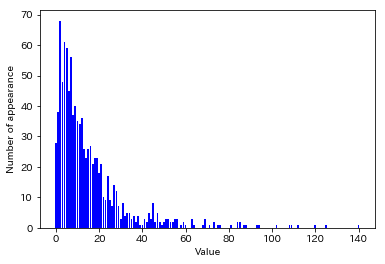

In [25]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel('Number of appearance')
plt.xlabel('Value')

このようにほとんどが小さい値だが、まれに大きい値をもつ分布というのは一般的なものである(ポワソン分布)。  
この分布をもった特徴量にリッジ回帰を適用してみる

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:,.3f}'.format(score))

Test score: 0.622


特徴量に対数をとって変換してみる。(0があると変換できないのでlog(x + 1))をとる

Text(0.5,0,'Value')

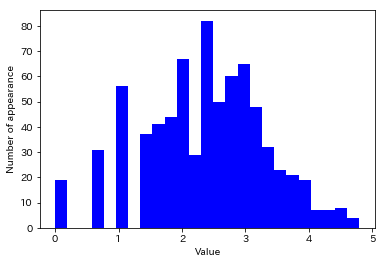

In [27]:
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

plt.hist(X_train_log[:,0], bins=25, color='b')
plt.ylabel('Number of appearance')
plt.xlabel('Value')

In [28]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score: {:,.3f}'.format(score))

Test score: 0.875


性能が向上したことがわかる。  
**決定木モデルにはスケーリングはあまり有効ではないことも確認しておこう**

In [29]:
from sklearn.ensemble import RandomForestRegressor
score = RandomForestRegressor().fit(X_train,y_train).score(X_test, y_test)
print('Test Score without scaling : {:,.3f}'.format(score))

score = RandomForestRegressor().fit(X_train_log,y_train).score(X_test_log, y_test)
print('Test Score with scaling : {:,.3f}'.format(score))

Test Score without scaling : 0.852
Test Score with scaling : 0.851


# まとめ
データセットの特徴量とモデルの組合せから最適な変換をみつけるのはある種の技芸(arts)だ。  
線形モデルにとってターゲットの変換は本質的なものだが、決定木ベースのモデルとってはそれほど重要なものではない。**決定木は自分で重要な交互作用を見つけることができるからである**。SVM、最近傍、NNはビニング、多項式、交互作用の変換の恩恵を受けるが、線形モデルほど大きいものではない